## Preprocessing

In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [5]:
#Balanced and good split between data
df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df2 = df.copy()

df2 = df2.drop(["EIN", "NAME"], axis=1)
df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Determine the number of unique values in each column.
df2.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [8]:
# Application_Type & Classification are only ones over 10 and ASK_AMT does not count

In [9]:
# Look at APPLICATION_TYPE value counts for binning
df2.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Chose a cutoff value and created a list of application types to be replaced
application_types_replaced = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_replaced:
    df2['APPLICATION_TYPE'] = df2['APPLICATION_TYPE'].replace(app,"Other")

# Check binning
df2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [17]:
# CLASSIFICATION value counts for binning
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [18]:
# CLASSIFICATION value counts >1
df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [19]:
df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts() < 700].index

Index(['C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300',
       'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120',
       'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235',
       'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260',
       'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190',
       'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900',
       'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283',
       'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500',
       'C2150'],
      dtype='object')

In [21]:
# Chose cutoff value and created list of classifications to be replaced
classifications_replaced = list(df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts() < 700].index)

# Replace in dataframe
for cls in classifications_replaced:
    df2['CLASSIFICATION'] = df2['CLASSIFICATION'].replace(cls,"Other")

# Check binning
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [22]:
# Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(df2)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [23]:
# Split preprocessed data into features and target arrays
X = df2.drop("IS_SUCCESSFUL", axis=1)
y = df2.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(25724, 44)
(8575, 44)


In [24]:
len(X.columns)

44

In [25]:
# Created StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn1 = tf.keras.models.Sequential()

# Added first Dense layer
nn1.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Added second layer
nn1.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Added output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check structure of the Sequential model
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 225       
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 247 (988.00 Byte)
Trainable params: 247 (988.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Compiled Sequential model and customized metrics
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn1.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
804/804 [==============================] - 3s 2ms/step - loss: 0.6577 - accuracy: 0.6519
Epoch 2/20
804/804 [==============================] - 3s 3ms/step - loss: 0.5847 - accuracy: 0.7220
Epoch 3/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5670 - accuracy: 0.7285
Epoch 4/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5601 - accuracy: 0.7294
Epoch 5/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.7291
Epoch 6/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7301
Epoch 7/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.7304
Epoch 8/20
804/804 [==============================] - 3s 4ms/step - loss: 0.5541 - accuracy: 0.7303
Epoch 9/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5536 - accuracy: 0.7309
Epoch 10/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7315

In [28]:
# Evaluate the model using test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5560 - accuracy: 0.7282 - 628ms/epoch - 2ms/step
Loss: 0.5559850335121155, Accuracy: 0.7281632423400879


In [29]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model.predict(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 1s 2ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8220  3825]
 [ 3079 10600]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.73      0.68      0.70     12045
           1       0.73      0.77      0.75     13679

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    



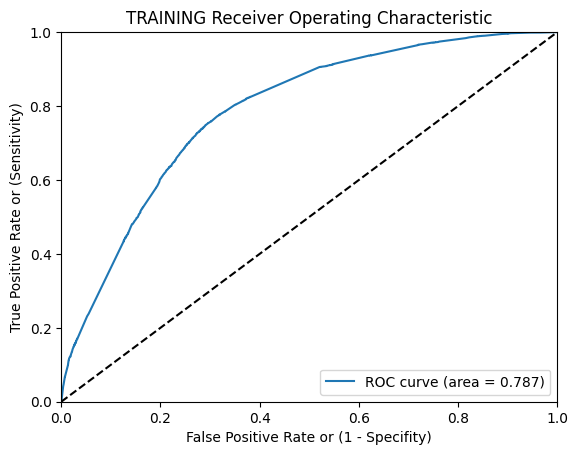



TESTING METRICS

    Test Confusion Matrix:
    [[2704 1289]
 [1042 3540]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.68      0.70      3993
           1       0.73      0.77      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



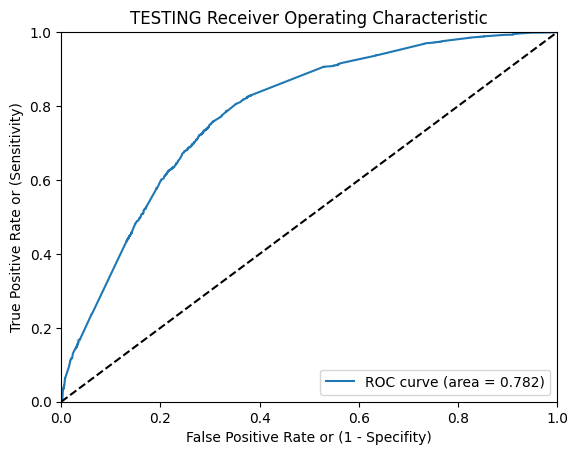

In [30]:
doClassification_NN(nn1, X_train_scaled, X_test_scaled, y_train, y_test)

In [31]:
# Export our model to HDF5 file
nn1.save("nn1.h5")

In [32]:
# OPTIMIZATIONS

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn2 = tf.keras.models.Sequential()

# Add first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Second layer
nn2.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Third layer
nn2.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the Sequential model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                675       
                                                                 
 dense_4 (Dense)             (None, 7)                 112       
                                                                 
 dense_5 (Dense)             (None, 5)                 40        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile Sequential model and customized metrics
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit model to training data
fit_model = nn2.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
804/804 [==============================] - 4s 3ms/step - loss: 0.5899 - accuracy: 0.7055
Epoch 2/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5571 - accuracy: 0.7289
Epoch 3/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5544 - accuracy: 0.7289
Epoch 4/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7291
Epoch 5/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7304
Epoch 6/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7286
Epoch 7/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7304
Epoch 8/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7300
Epoch 9/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5474 - accuracy: 0.7308
Epoch 10/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7317

In [35]:
# Evaluate model with test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5539 - accuracy: 0.7271 - 669ms/epoch - 2ms/step
Loss: 0.5538706183433533, Accuracy: 0.7271137237548828


268/268 [==============================] - 0s 2ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8356  3689]
 [ 3136 10543]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.73      0.69      0.71     12045
           1       0.74      0.77      0.76     13679

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    



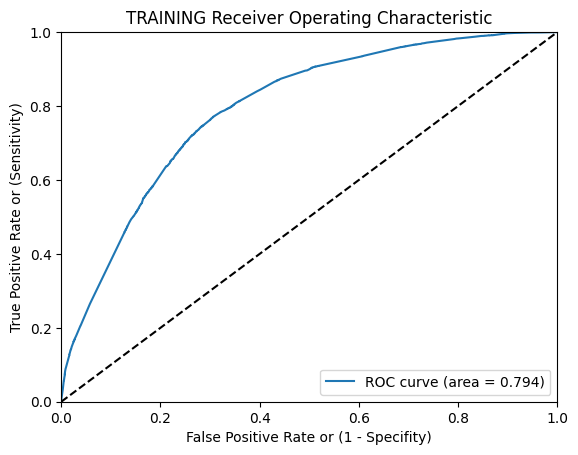



TESTING METRICS

    Test Confusion Matrix:
    [[2740 1253]
 [1087 3495]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.69      0.70      3993
           1       0.74      0.76      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.73      8575

    



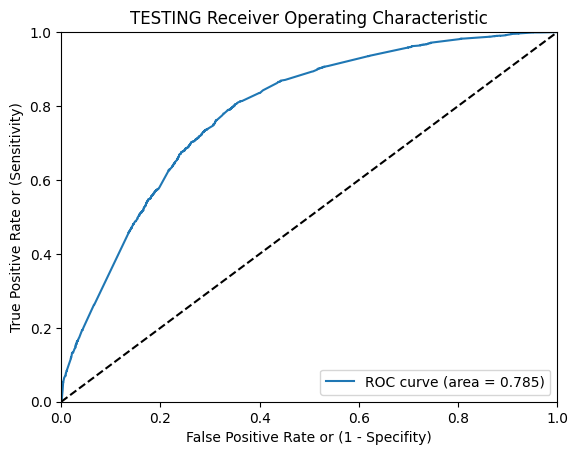

In [36]:
doClassification_NN(nn2, X_train_scaled, X_test_scaled, y_train, y_test)

In [38]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate / (1 - Specifity)')
    plt.ylabel('True Positive Rate / (Sensitivity)')
    plt.title('Testing Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix:
    [[ 8556  3489]
 [ 2809 10870]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.71      0.73     12045
           1       0.76      0.79      0.78     13679

    accuracy                           0.76     25724
   macro avg       0.75      0.75      0.75     25724
weighted avg       0.76      0.76      0.75     25724

    



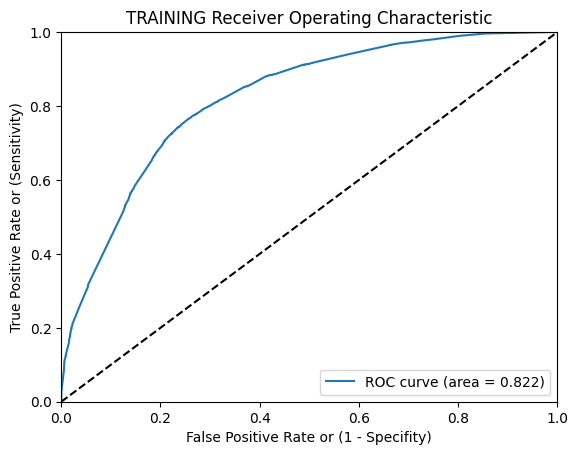



TESTING METRICS

    Test Confusion Matrix:
    [[2699 1294]
 [1075 3507]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.68      0.69      3993
           1       0.73      0.77      0.75      4582

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

    



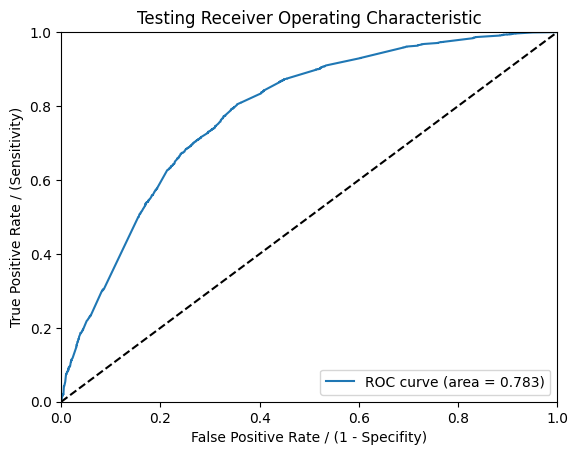

In [39]:
# initialize
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train_scaled, y_train)

doClassification(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

In [40]:
df.NAME.value_counts()[0:30]

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

In [42]:
df3 = df2.copy()
df3["NAME"] = df['NAME']

# Choose cutoff value and create list of names to replace
names_replaced = list(df3['NAME'].value_counts().loc[df3['NAME'].value_counts() < 200].index)

# Replace in dataframe
for cls in names_replaced:
    df3['NAME'] = df3['NAME'].replace(cls,"Other")

# Check binning
df3['NAME'].value_counts()

Other                                                                 28123
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [44]:
df3 = pd.get_dummies(df3)

# Split preprocessed data into features and target arrays
X = df3.drop("IS_SUCCESSFUL", axis=1)
y = df3.IS_SUCCESSFUL

# Split preprocessed data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

# StandardScaler
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

(25724, 59)
(8575, 59)


In [45]:
# Define model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn3 = tf.keras.models.Sequential()

# Add first Dense layer
nn3.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns))) # we have 44 features

# Second layer
nn3.add(tf.keras.layers.Dense(units=7, activation="relu"))

nn3.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer that uses a probability activation function
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the Sequential model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 15)                900       
                                                                 
 dense_8 (Dense)             (None, 7)                 112       
                                                                 
 dense_9 (Dense)             (None, 5)                 40        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1058 (4.13 KB)
Trainable params: 1058 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Compile Sequential model and customized metrics
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn3.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
804/804 [==============================] - 5s 4ms/step - loss: 0.5615 - accuracy: 0.7141
Epoch 2/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5178 - accuracy: 0.7459
Epoch 3/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5123 - accuracy: 0.7481
Epoch 4/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5096 - accuracy: 0.7521
Epoch 5/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5080 - accuracy: 0.7517
Epoch 6/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5067 - accuracy: 0.7516
Epoch 7/20
804/804 [==============================] - 3s 4ms/step - loss: 0.5055 - accuracy: 0.7534
Epoch 8/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5049 - accuracy: 0.7528
Epoch 9/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5046 - accuracy: 0.7526
Epoch 10/20
804/804 [==============================] - 2s 3ms/step - loss: 0.5037 - accuracy: 0.7550

In [47]:
# Evaluate model with test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5119 - accuracy: 0.7444 - 503ms/epoch - 2ms/step
Loss: 0.5119328498840332, Accuracy: 0.7443732023239136


268/268 [==============================] - 0s 2ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 7499  4546]
 [ 1721 11958]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.81      0.62      0.71     12045
           1       0.72      0.87      0.79     13679

    accuracy                           0.76     25724
   macro avg       0.77      0.75      0.75     25724
weighted avg       0.77      0.76      0.75     25724

    



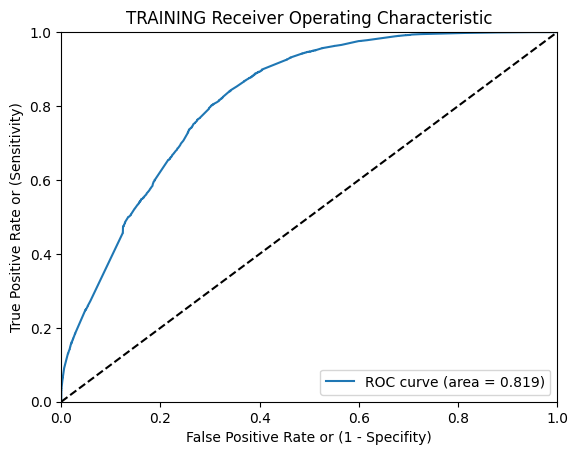



TESTING METRICS

    Test Confusion Matrix:
    [[2444 1549]
 [ 643 3939]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.79      0.61      0.69      3993
           1       0.72      0.86      0.78      4582

    accuracy                           0.74      8575
   macro avg       0.75      0.74      0.74      8575
weighted avg       0.75      0.74      0.74      8575

    



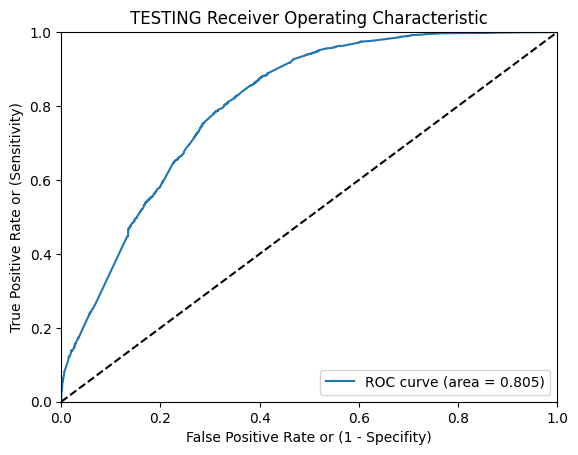

In [48]:
doClassification_NN(nn3, X_train_scaled, X_test_scaled, y_train, y_test)

TRAINING METRICS

    Train Confusion Matrix:
    [[ 8195  3850]
 [ 2020 11659]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.80      0.68      0.74     12045
           1       0.75      0.85      0.80     13679

    accuracy                           0.77     25724
   macro avg       0.78      0.77      0.77     25724
weighted avg       0.78      0.77      0.77     25724

    



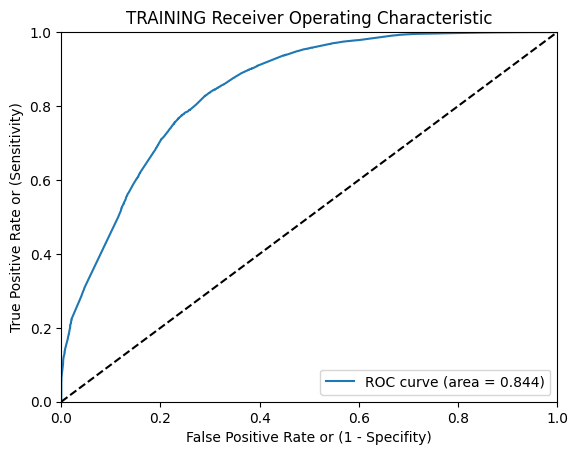



TESTING METRICS

    Test Confusion Matrix:
    [[2580 1413]
 [ 787 3795]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.77      0.65      0.70      3993
           1       0.73      0.83      0.78      4582

    accuracy                           0.74      8575
   macro avg       0.75      0.74      0.74      8575
weighted avg       0.75      0.74      0.74      8575

    



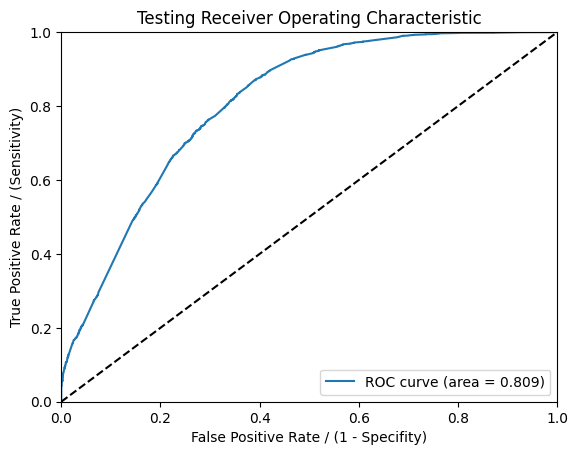

In [49]:
# Initialize
xgb = XGBClassifier(random_state=42)

# Fit
xgb.fit(X_train_scaled, y_train)

doClassification(xgb, X_train_scaled, X_test_scaled, y_train, y_test)